# **Project: iOT data analysis**
### Project detail:
In this Dataset, we have the temperature readings from IoT devices installed outside and inside of an anonymous room. Because the device was in the testing phase, it was uninstalled or shut off several times during the entire reading period, which caused some outliers and missing-values.


### Dataset details:


1. id : unique IDs for each reading
2. room_id/id : room id in which device was installed(currently 'admin room' only for example purpose).
3. noted_date : date and time of reading
4. temp : temperature readings
5. out/in : whether reading was taken from device installed inside or outside of room





In [2]:
import pandas as pd
df = pd.read_csv('data/temp-data.csv')

In [3]:
df.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [4]:
df.tail()

,id,room_id/id,noted_date,temp,out/in
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In
97602,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In
97603,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In
97604,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In
97605,__export__.temp_log_133741_32958703,Room Admin,28-07-2018 07:06,31,In


In [5]:
# checking for any duplicate rows
df.describe(include="all")

,id,room_id/id,noted_date,temp,out/in
count,97606,97606,97606,97606.000000,97606
unique,97605,1,27920,NaN,2
top,__export__.temp_log_196108_4a983c7e,Room Admin,12-09-2018 03:09,NaN,Out
freq,2,97606,65,NaN,77261
mean,NaN,NaN,NaN,35.053931,NaN
std,NaN,NaN,NaN,5.699825,NaN
min,NaN,NaN,NaN,21.000000,NaN
25%,NaN,NaN,NaN,30.000000,NaN
50%,NaN,NaN,NaN,35.000000,NaN
75%,NaN,NaN,NaN,40.000000,NaN


In [6]:
#removed the duplicate rows keeping the first one
df.drop_duplicates(keep="first", inplace=True)

In [7]:
df.describe(include="all")

,id,room_id/id,noted_date,temp,out/in
count,97605,97605,97605,97605.000000,97605
unique,97605,1,27920,NaN,2
top,__export__.temp_log_196018_adf4ef79,Room Admin,12-09-2018 03:09,NaN,Out
freq,1,97605,65,NaN,77260
mean,NaN,NaN,NaN,35.053860,NaN
std,NaN,NaN,NaN,5.699811,NaN
min,NaN,NaN,NaN,21.000000,NaN
25%,NaN,NaN,NaN,30.000000,NaN
50%,NaN,NaN,NaN,35.000000,NaN
75%,NaN,NaN,NaN,40.000000,NaN


In [8]:
#checking for missing values
df.isna().sum()

id            0
room_id/id    0
noted_date    0
temp          0
out/in        0
dtype: int64

In [9]:
#printing the df
df

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In
...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In
97602,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In
97603,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In
97604,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In


In [10]:
#seperating date and time
date = df["noted_date"].str.split(' ', n=1, expand=True)
df["date"] = date[0]
df["time"] = date[1]

In [11]:
df

,id,room_id/id,noted_date,temp,out/in,date,time
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In,08-12-2018,09:30
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In,08-12-2018,09:30
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out,08-12-2018,09:29
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out,08-12-2018,09:29
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In,08-12-2018,09:29
...,...,...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In,28-07-2018,07:07
97602,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In,28-07-2018,07:07
97603,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In,28-07-2018,07:06
97604,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In,28-07-2018,07:06


In [12]:
#extracting months from date
month = df["date"].str.split('-', n=2, expand=True)
df["month"] = month[1]

In [13]:
#changing the dtype of month from object to numeric
df["month"].apply(pd.to_numeric)

0        12
1        12
2        12
3        12
4        12
         ..
97601     7
97602     7
97603     7
97604     7
97605     7
Name: month, Length: 97605, dtype: int64

In [14]:
#deducing season based on the month
d = dict({1: 'Winter', 2: 'Spring', 3: 'Spring', 4: 'Summer', 5: 'Summer', 6: 'Summer', 7: 'Monsoon', 8: 'Monsoon', 9: 'Monsoon', 10: 'Autumn', 11: 'Autumn', 12: 'Winter' })
df["season"] = df.apply(lambda row: d[int(row["month"])], axis = 1 )

In [15]:
#printing the df
df

,id,room_id/id,noted_date,temp,out/in,date,time,month,season
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In,08-12-2018,09:30,12,Winter
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In,08-12-2018,09:30,12,Winter
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out,08-12-2018,09:29,12,Winter
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out,08-12-2018,09:29,12,Winter
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In,08-12-2018,09:29,12,Winter
...,...,...,...,...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In,28-07-2018,07:07,07,Monsoon
97602,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In,28-07-2018,07:07,07,Monsoon
97603,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In,28-07-2018,07:06,07,Monsoon
97604,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In,28-07-2018,07:06,07,Monsoon


In [16]:
#deducing day_time from time
def getTime(time):
  local_time = int(time.split(':')[0])

  if (local_time>=6 and local_time<=18):
    return 'Day'
  else:
    return 'Night'

df["day_time"] = df.apply(lambda row: getTime(row["time"]), axis=1)

In [17]:
#looking the df
df

,id,room_id/id,noted_date,temp,out/in,date,time,month,season,day_time
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In,08-12-2018,09:30,12,Winter,Day
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In,08-12-2018,09:30,12,Winter,Day
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out,08-12-2018,09:29,12,Winter,Day
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out,08-12-2018,09:29,12,Winter,Day
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In,08-12-2018,09:29,12,Winter,Day
...,...,...,...,...,...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In,28-07-2018,07:07,07,Monsoon,Day
97602,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In,28-07-2018,07:07,07,Monsoon,Day
97603,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In,28-07-2018,07:06,07,Monsoon,Day
97604,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In,28-07-2018,07:06,07,Monsoon,Day


In [18]:
#getting max temp for each season during day and night
df.groupby(['season', 'day_time']).max()

id  room_id/id  \
season  day_time                                                    
Autumn  Day        __export__.temp_log_99993_5c86dbe9  Room Admin   
        Night      __export__.temp_log_99925_94f7ac28  Room Admin   
Monsoon Day          __export__.temp_log_999_15c3052f  Room Admin   
        Night       __export__.temp_log_9999_567f615b  Room Admin   
Winter  Day       __export__.temp_log_196134_bd201015  Room Admin   
        Night     __export__.temp_log_195525_4c6f82e7  Room Admin   

                        noted_date  temp out/in        date   time month  
season  day_time                                                          
Autumn  Day       31-10-2018 18:56    50    Out  31-10-2018  18:59    11  
        Night     31-10-2018 23:57    49    Out  31-10-2018  23:59    11  
Monsoon Day       31-07-2018 16:28    51    Out  31-07-2018  18:59    09  
        Night     30-09-2018 22:59    50    Out  30-09-2018  23:59    09  
Winter  Day       08-12-2018 09:30    43    Out  08-12-2018  18:59    12  
        Night     08-12-2018 05:59    40    Out  08-12-2018  23:59    12

In [19]:
#getting min temp for each season during day and night
df.groupby(['season', 'day_time']).min()

id  room_id/id  \
season  day_time                                                    
Autumn  Day       __export__.temp_log_100004_ea0b9f21  Room Admin   
        Night     __export__.temp_log_100025_4cfe74e0  Room Admin   
Monsoon Day       __export__.temp_log_100009_51bd5a46  Room Admin   
        Night     __export__.temp_log_100007_e9852112  Room Admin   
Winter  Day       __export__.temp_log_172022_8bc58b91  Room Admin   
        Night     __export__.temp_log_171456_a6e6de9d  Room Admin   

                        noted_date  temp out/in        date   time month  
season  day_time                                                          
Autumn  Day       01-11-2018 06:02    22     In  01-11-2018  06:00    10  
        Night     01-11-2018 00:06    25     In  01-11-2018  00:00    10  
Monsoon Day       02-08-2018 06:42    24     In  02-08-2018  06:00    07  
        Night     03-09-2018 19:00    25     In  03-09-2018  00:00    07  
Winter  Day       01-12-2018 06:08    21     In  01-12-2018  06:00    12  
        Night     01-12-2018 00:00    24     In  01-12-2018  00:00    12

In [20]:
#trying to analyse the time more
def getHouroftheDay(time):
  local_time = int(time.split(':')[0])

  if (local_time>=0 and local_time<=3):
    return 'Late Night'
  elif (local_time>3 and local_time<=6):
    return 'Early Morning'
  elif (local_time>6 and local_time<=12):
    return 'Morning'
  elif (local_time>12 and local_time<=15):
    return 'Afternoon'
  elif (local_time>15 and local_time<=18):
    return 'Evening'
  else:
    return 'Night'

df["hour_of_the_day"] = df.apply(lambda row: getTime(row["time"]), axis=1)

In [21]:
#looking the df
df

,id,room_id/id,noted_date,temp,out/in,date,time,month,season,day_time,hour_of_the_day
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In,08-12-2018,09:30,12,Winter,Day,Day
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In,08-12-2018,09:30,12,Winter,Day,Day
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out,08-12-2018,09:29,12,Winter,Day,Day
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out,08-12-2018,09:29,12,Winter,Day,Day
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In,08-12-2018,09:29,12,Winter,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In,28-07-2018,07:07,07,Monsoon,Day,Day
97602,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In,28-07-2018,07:07,07,Monsoon,Day,Day
97603,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In,28-07-2018,07:06,07,Monsoon,Day,Day
97604,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In,28-07-2018,07:06,07,Monsoon,Day,Day


In [22]:
#daily mean temp
dailyTemp = df.groupby(['date'], as_index=False).mean()

In [23]:
#daily temp df
dailyTemp

,date,temp
0,01-11-2018,40.731760
1,01-12-2018,37.379501
2,02-08-2018,32.176471
3,02-11-2018,41.193853
4,02-12-2018,37.698765
...,...,...
81,30-09-2018,47.949555
82,30-10-2018,38.940385
83,30-11-2018,38.187097
84,31-07-2018,31.953488


<AxesSubplot:xlabel='date', ylabel='temp'>

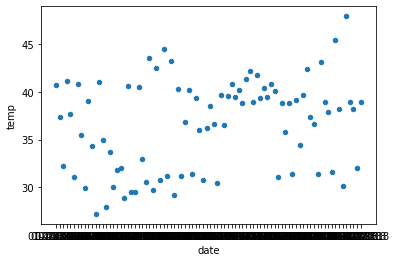

In [24]:
#daily mean temp plot
dailyTemp.plot.scatter(x='date', y='temp')
#from several plots plotted with the given dataset we have recorded the highest mean temprature on 30-09-18
# and the lowest mean temp on 01-11-2018

<AxesSubplot:>

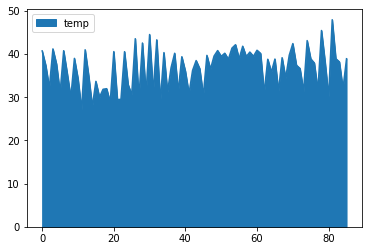

In [65]:
#area representation of daily mean temprature analysis
dailyTemp.plot.area()

In [25]:
#monthly mean temp
monthlyTemp = df.groupby(['month'], as_index=False).mean()

In [26]:
#monthly temp df
monthlyTemp

,month,temp
0,07,31.571429
1,08,30.531013
2,09,31.056060
3,10,39.265310
4,11,38.956663
5,12,34.432795


<AxesSubplot:xlabel='month', ylabel='temp'>

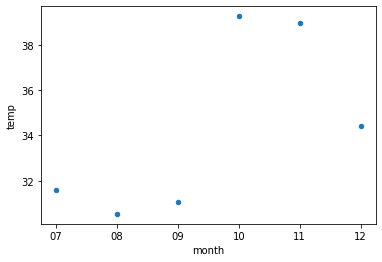

In [27]:
#monthly mean temp plot
monthlyTemp.plot.scatter(x='month', y='temp')
#from several plots plotted with the given dataset we have recorded the highest mean temprature on October
# and the lowest mean temp on August

<AxesSubplot:>

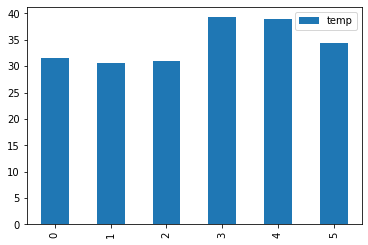

In [63]:
#bar representation of month wise mean temprature analysis
monthlyTemp.plot.bar()
# here 0 denotes july month
# here 1 denotes august month
# here 2 denotes september month
# here 3 denotes october month
# here 4 denotes november month
# here 5 denotes december month

In [34]:
#seasonaly mean temp
seasonAnalysis = df.groupby(['season'], as_index=False).mean()

In [29]:
#seasonaly df
seasonAnalysis

,season,temp
0,Autumn,39.206090
1,Monsoon,31.031749
2,Winter,34.432795


<AxesSubplot:xlabel='temp', ylabel='season'>

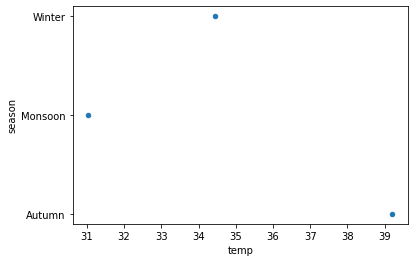

In [30]:
#seasonaly scatter plot
seasonAnalysis.plot.scatter(x='temp', y='season')
#from several plots plotted with the given dataset we have recorded the highest mean temprature Autumn
# and the lowest mean temp on Monsoon
# from the above few plots we can say 

<AxesSubplot:>

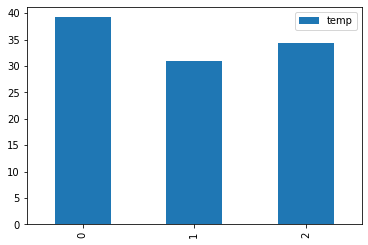

In [62]:
#bar representation of season wise mean temprature analysis
seasonAnalysis.plot.bar()
# here 0 denotes autumn season
# here 1 denotes monsoon season
# here 2 denotes winter season

In [54]:
dailyInOutTemp = df.groupby(['noted_date', 'out/in'], as_index=False).mean()

In [55]:
dailyInOutTemp.describe(include="all")

,noted_date,out/in,temp
count,31338,31338,31338.000000
unique,27920,2,NaN
top,12-09-2018 09:12,Out,NaN
freq,2,22605,NaN
mean,NaN,NaN,37.048407
std,NaN,NaN,6.308628
min,NaN,NaN,21.000000
25%,NaN,NaN,31.000000
50%,NaN,NaN,37.000000
75%,NaN,NaN,42.000000
